In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Function to calculate the log-likelihood for a given number of observations and defaults
def log_likelihood(n, k):
    p = k / n if n != 0 else 0
    if p == 0 or p == 1:
        return 0
    return k * np.log(p) + (n - k) * np.log(1 - p)

# Load the data from a CSV file into a DataFrame
dataframe = pd.read_csv('Task 3 and 4_Loan_Data.csv')

# Extract the 'default' and 'fico_score' columns as lists
x = dataframe['default'].to_list()  # 1 if defaulted, 0 otherwise
y = dataframe['fico_score'].to_list()  # FICO scores
n = len(x)  # Number of records

# Initialize lists to store cumulative counts of defaults and total records for each FICO score
default = [0 for i in range(551)]       # as FICO score range 300 to 850
total = [0 for i in range(551)]

# Populate the 'default' and 'total' lists
for i in range(n):
    y[i] = int(y[i])
    default[y[i] - 300] += x[i]
    total[y[i] - 300] += 1

# Compute cumulative sums for 'default' and 'total' lists
for i in range(1, 551):
    default[i] += default[i - 1]
    total[i] += total[i - 1]

# Number of partitions to find
r = 10
# Initialize DP table with very low initial value
dp = [[[-10**18, 0] for _ in range(551)] for _ in range(r + 1)]

# Fill the DP table
for i in range(r + 1):  # For each number of partitions from 0 to r
    for j in range(551):  # For each FICO score index
        if i == 0:
            dp[i][j][0] = 0  # Base case: no partitions, log-likelihood is 0
        else:
            for k in range(j):  # Previous FICO score index
                if total[j] == total[k]:
                    continue  # Skip if total counts are equal (prevent division by zero)
                if i == 1:
                    dp[i][j][0] = log_likelihood(total[j], default[j])
                else:
                    # Update DP value considering partition at index k
                    potential_value = log_likelihood(total[j] - total[k], default[j] - default[k]) + dp[i - 1][k][0]
                    if dp[i][j][0] < potential_value:
                        dp[i][j][0] = potential_value
                        dp[i][j][1] = k

# Retrieve the best log-likelihood value found
best_value = round(dp[r][550][0], 4)
print(f"Best log-likelihood: {best_value}")

# Trace back to find the optimal partition points
k = 550
buckets = []
while r >= 0:
    buckets.append(k + 300)  # Convert FICO index back to FICO score
    k = dp[r][k][1]  # Move to the previous partition index
    r -= 1

# Print the bucket boundaries in ascending order
buckets = sorted(buckets)
print(f"Bucket boundaries: {buckets}")

Best log-likelihood: -4217.8245
Bucket boundaries: [300, 520, 552, 580, 611, 649, 696, 732, 752, 753, 850]


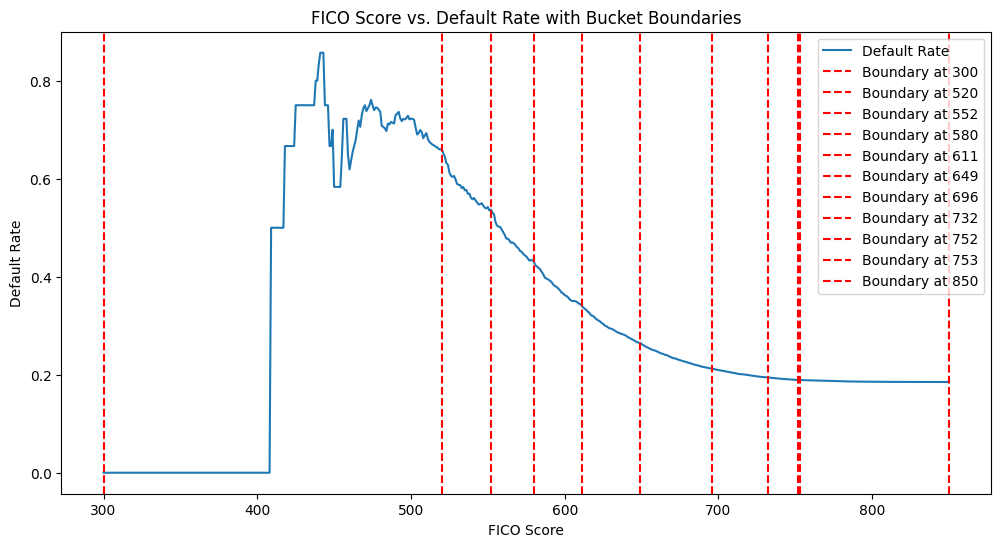

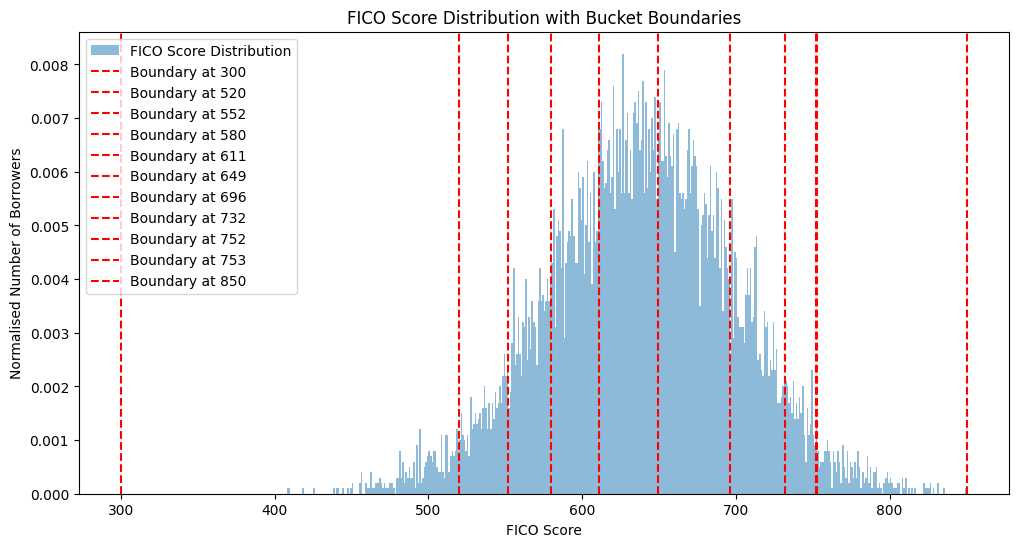

In [5]:
# Assume `buckets` contains the bucket boundaries and `default` and `total` contain cumulative sums
fico_scores = np.arange(300, 851)
defaults = np.array([default[i - 300] for i in fico_scores])
totals = np.array([total[i - 300] for i in fico_scores])
fico = dataframe['fico_score']

# Calculate the default rate for each FICO score
default_rate = np.divide(defaults, totals, out=np.zeros_like(defaults, dtype=float), where=totals != 0)

# Plot 1: FICO Score vs. Default Rate with Bucket Boundaries
plt.figure(figsize=(12, 6))
plt.plot(fico_scores, default_rate, label='Default Rate')
for boundary in buckets:
    plt.axvline(boundary, color='r', linestyle='--', label=f'Boundary at {boundary}')
plt.xlabel('FICO Score')
plt.ylabel('Default Rate')
plt.title('FICO Score vs. Default Rate with Bucket Boundaries')
plt.legend()
plt.show()

# Plot 2: FICO Score Distribution with Buckets
plt.figure(figsize=(12, 6))
plt.hist(fico, bins=fico_scores, alpha=0.5, label='FICO Score Distribution', density=True)      # normalised
for boundary in buckets:
    plt.axvline(boundary, color='r', linestyle='--', label=f'Boundary at {boundary}')
plt.xlabel('FICO Score')
plt.ylabel('Normalised Number of Borrowers')
plt.title('FICO Score Distribution with Bucket Boundaries')
plt.legend()
plt.show()